# Section 4 - High Dimensional Visualizations

## Notations

Scalars:  *a*  
Vectors:  ***x***  
Matrices: ***X***

Euclidean Norm: ||***x***||

Number of observations: *n*  
Number of variables:    *p*  
(Data matrix ***X*** is a *n* $\times$ *p* matrix.)

In [1]:
library(data.table)
library(tidyr)
library(magrittr)
options(repr.plot.width = 7, repr.plot.height = 5, repr.plot.res = 100)     # set size of plots


Attaching package: ‘magrittr’

The following object is masked from ‘package:tidyr’:

    extract



In [2]:
# --------------------

## Data Matrix Preparation



In [3]:
mat <- as.matrix(mtcars[1:10, c("mpg", "carb", "hp", "wt")])
rownames(mat) <- rownames(mtcars)[1:10]
colnames(mat) <- c("Miles.per.gallon", "Carburetor", "Horsepower", "Weight")
mat
summary(mat)

,Miles.per.gallon,Carburetor,Horsepower,Weight
Mazda RX4,21.0,4,110,2.620
Mazda RX4 Wag,21.0,4,110,2.875
Datsun 710,22.8,1,93,2.320
Hornet 4 Drive,21.4,1,110,3.215
Hornet Sportabout,18.7,2,175,3.440
Valiant,18.1,1,105,3.460
Duster 360,14.3,4,245,3.570
Merc 240D,24.4,2,62,3.190
Merc 230,22.8,2,95,3.150
Merc 280,19.2,4,123,3.440


 Miles.per.gallon   Carburetor     Horsepower        Weight     
 Min.   :14.30    Min.   :1.00   Min.   : 62.0   Min.   :2.320  
 1st Qu.:18.82    1st Qu.:1.25   1st Qu.: 97.5   1st Qu.:2.944  
 Median :21.00    Median :2.00   Median :110.0   Median :3.203  
 Mean   :20.37    Mean   :2.50   Mean   :122.8   Mean   :3.128  
 3rd Qu.:22.45    3rd Qu.:4.00   3rd Qu.:119.8   3rd Qu.:3.440  
 Max.   :24.40    Max.   :4.00   Max.   :245.0   Max.   :3.570  

In [4]:
# --------------------

## Heatmaps (`pheatmap`)

Heatmaps display data matrices as image by color-coding entries, therefore bigger data matrices can be visualized (up to 1000 $\times$ 1000 matrices, which is about the pixel resolution of a screen).  
(Hence a bit better for lots of data than data scatterplots.)

Use `pheatmap` package for pretty heatmaps.

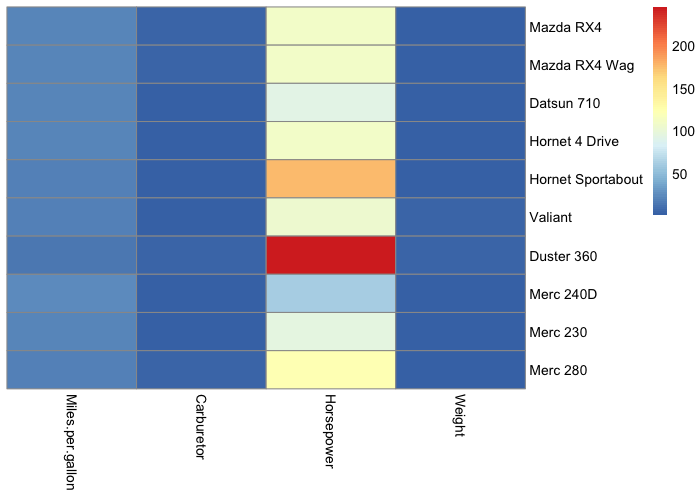

In [5]:
library(pheatmap)                # pretty heatmap
pheatmap(mat,
         cluster_rows=FALSE, 
         cluster_cols=FALSE)

### 1. Centering and Scaling Variables

Important: bring variables to common scale.  
Advantages: good for visualization and computation, independent of units, etc.

---

Widely used operations:
1. **centering**: subtract the mean
2. **standard scaling**/**Z-score multiplication**: centering + dividing by standard deviation

In base ***R***: `scale()` (usually used for variables)  
In `pheatmap`: `scale` argument (scale data by rows or columns)

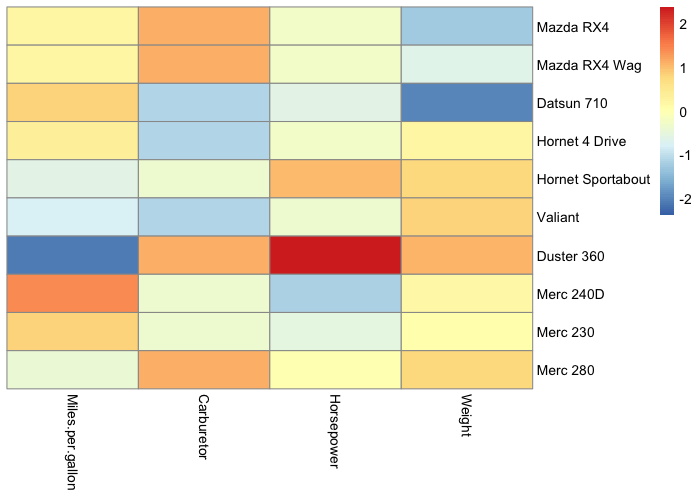

In [6]:
pheatmap(mat,
         cluster_rows=FALSE,
         cluster_cols=FALSE, 
         scale='column')
# default color scale centered on 0

In [7]:
# --------------------

## Clustering

Problem of heatmap: hard to see patterns.  
Advantages of clustering: groups observations by similarities and therefore helpf to determine patterns in data matrices. Apply to variables by applying clustering on transposed matrix.

Multiple clustering methods exist.

### 1. K-Means Clustering

#### 1.1 Objective

Aim: partition observations into *K* non-overlapping clusters $C_{1}, \ldots, C_{\it{K}}$, *K* predefined.  
Remark: every observation belongs to only one cluster.

Cluster centroids $\bf{\mu}_{1}, \ldots, \bf{\mu}_{\it{K}}$: associate each observation to its closest centroid.

---

<u>*Formally*</u>:  
determine clusters $C_{1}, \ldots, C_{\it{K}}$ with centroids $\bf{\mu}_{1}, \ldots, \bf{\mu}_{\it{K}}$ s.t.: $\text{min}_{C_{1}, \ldots, C_{\it{K}}, \bf{\mu}_{1}, \ldots, \bf{\mu}_{\it{K}}} \;\; \sum^{\it{K}}_{k=1} \sum_{i \in C_{k}} || \bf{x}_{i} - \bf{\mu}_{k}||^{2}$

#### 1.2 Algorithm

Observations based on minimization problem:
1. difficult to compute.
2. if centroids are given: $|| \bf{x}_{i} - \bf{\mu}_{k}||^{2}$ can be minimized by including observations to cluster of their closest centroid.
3. if clusters are given: values of centroids minimizing $\sum_{i \in C_{k}} || \bf{x}_{i} - \bf{\mu}_{k}||^{2}$ are the observation means, i.e. $\bf{\mu}_{k} = \frac{1}{|C_{k}|} \sum_{i \in C_{k}} \bf{x}_{i}$ (centroids = cluster means).

---

<u>*K-Means Algorithm*</u>:
1. choose *K* initial centroids (e.g. via sampling random observations)
2. assign each observation to its nearest centroid based on the Euclidean distance (i.e. define clusters)
3. update centroids by taking mean value of all observations in each cluster (defined in step 3)
4. repeat step 2 and 3 until difference between new and old centroids is small enough

Problem: no guarantee to reach optimal solution, solution depends on initialization.

#### 1.3 Considerations and Drawbacks of K-Means Clustering

Following assumptions have to be met when performing *K*-Means clustering:
1. *K* properly selected
2. clusters isotropically distributed (variables in each cluster not correlated and have equal variance)
3. clusters have equal/similar variance
4. clusters have similar size

#### 1.4  K-Means Clustering in R (`kmeans()`)

*K*-Means algorithm in ***R***: `kmeans()`.

Useful: scale variable before applying algorithm s.t. variables with larges scales do not dominate and to reduce problem of anisotropic clusters.

Hint: `annotation_row` argument in `pheatmap()` generates color-coded row annotations (on the left).

Mazda RX4     Mazda RX4 Wag        Datsun 710    Hornet 4 Drive 
                1                 1                 1                 1 
Hornet Sportabout           Valiant        Duster 360         Merc 240D 
                2                 2                 2                 1 
         Merc 230          Merc 280 
                1                 2

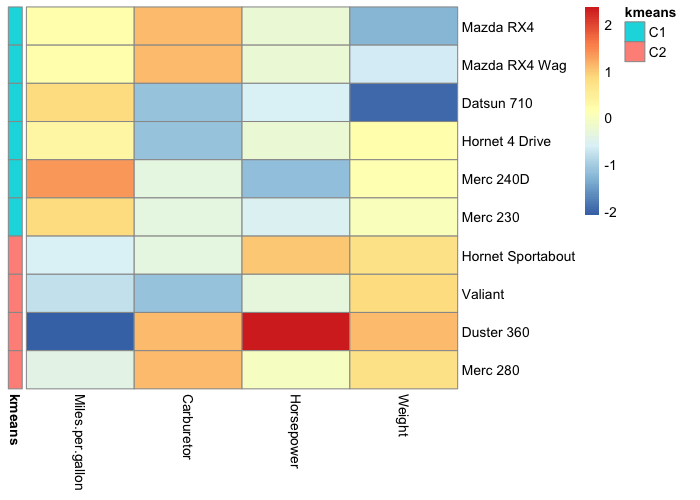

In [8]:
k <- 2
X <- scale(mat)                           # use the scaled variables for the clustering
clust_km <- kmeans(X, k, nstart = 20)     # K-Means 20 times 
clust_km$cluster                          # clusters of the best clustering

# create the row annotation data frame
row.ann <- data.frame(
  kmeans = paste0("C",clust_km$cluster)   # we call the cluster C1,..,CK.
  )

# rownames are used to match the matrix rows with the row annotation data frame. 
# We can now safely reorder the rows of X.
rownames(row.ann) <- rownames(X) 

# o: order of the rows to have increasing cluster number
o <- order(clust_km$cluster) 

pheatmap(
  X[o,],                                     # X with ordered rows according to cluster number  
  scale='none',                              # no need to scale, X is scaled
  annotation_row = row.ann,
  cluster_rows=FALSE, cluster_cols=FALSE
  )

### 2. Hierarchical Clustering

Major limitation of *K*-Means algorithm: relies on predefined number of clusters.

Hierachical clustering explores multiple levels of clustering granularity at once (by computing nested clusters).  
Result: tree-based representation of observations ("dendrogram").  
No objective function available, simply defined by "how it operates".

---

Bottom-up/agglomerative hierarchical clustering:
1. Initialization: compute all $n(n-1)/2$ pairwise dissimilarities between the $n$ observations (typical measure: Euclidean distance).  
    Each observation treated as one cluster.
2. for $i = n, n-1, \ldots, 2$:
    - fuse two clusters with lowest dissimilarity, which indicates height of fusion in dendrogram
    - compute new pairwise inter-cluster dissimilarities among $i-1$ remaining clusters (using linkage rule)
    
---

Linkage rules define dissimilarities between clusters, examples (*A*, *B* clusters):
- Complete: dissimilarity of *A* and *B* = largest dissimilarity of elements in *A* and *B*
- Single: dissimilarity of *A* and *B* = smallest dissimilarity of elements in *A* and *B*
- Average: dissimilarity of *A* and *B* = average dissimilarity of elements in *A* and *B*
- Controid: dissimilarity of *A* and *B* = dissimilarity of centroids (i.e. mean vectors) of *A* and *B*

Note: complete and average are used most often.

#### 2.1 Hierarchical Clustering in R (`hclust()`)

Performed in two steps:
1. compute distance between observations (i.e. rows) across variables (i.e. columns) via `dist()` function (default: Euclidean distance).
2. use resulting distance matrix as dissimilarity matrix to perform hierarchical clustering via `hclust()` function (default linkage rule: complete)

Useful: scale variables.

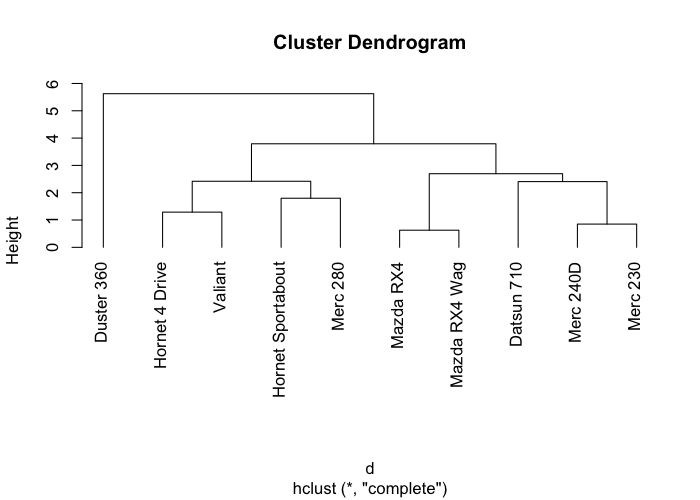

In [9]:
# used scaled example matrix `X` from before
d <- dist(X)          # compute distance matrix with default (Euclidean)
hc <- hclust(d)       # apply hierarchical clustering with default (complete linkage rule)

plot(hc, hang=-1)     # hang=-1 align observation labels at the bottom of the dendrogram

#### 2.2 Pretty Heatmaps Including Hierarchical Clustering

Use the `cluster_rows` and `cluster_col` arguments in `pheatmap()` to `TRUE` to include hierarchical clustering (`TRUE` is also default values).

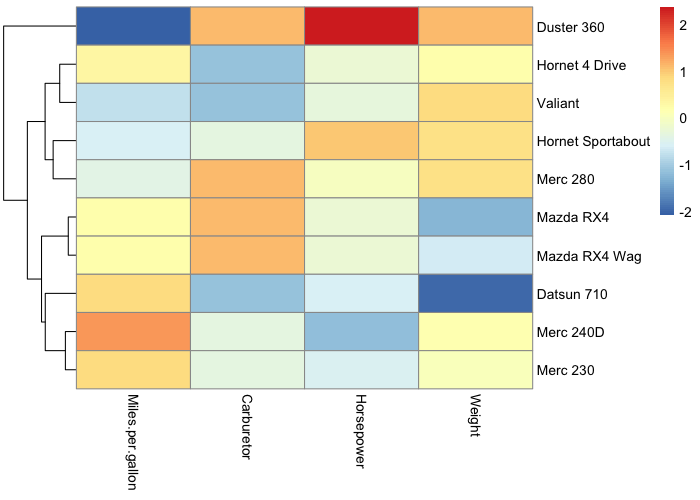

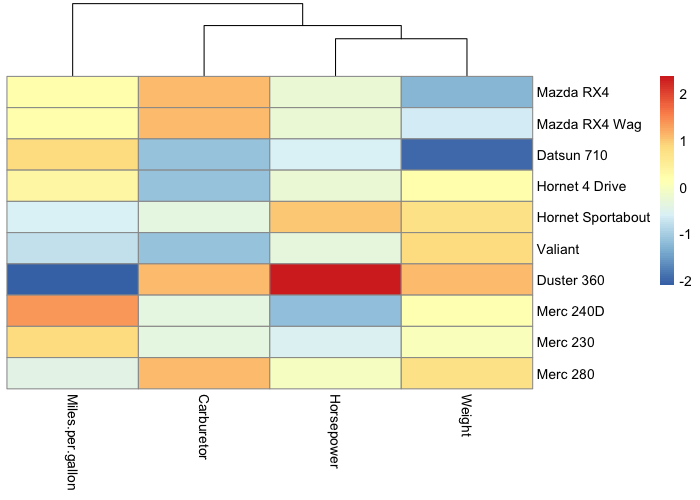

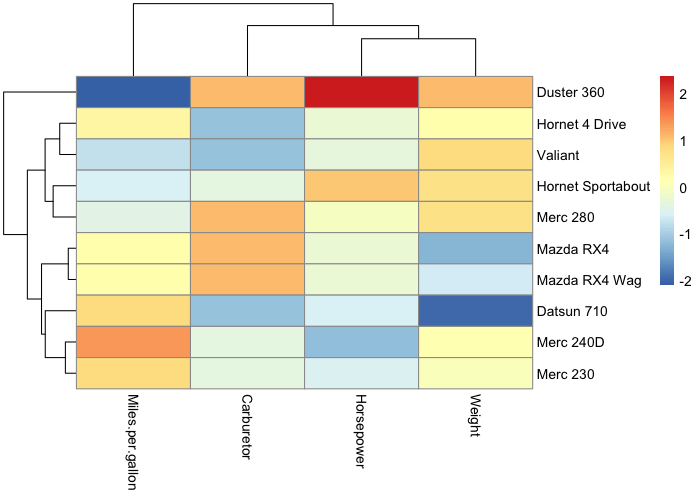

In [10]:
pheatmap(X,
         cluster_rows=TRUE,      # main difference: this is now TRUE!
         cluster_cols=FALSE,
         scale='none')

pheatmap(X,
         cluster_rows=FALSE,
         cluster_cols=TRUE,
         scale='none')

pheatmap(X,
         cluster_rows=TRUE,
         cluster_cols=TRUE,
         scale='none')
         
# can be more useful than K-Mean, i.e. shows one outlier (Duster 360) here!

#### 2.3 Cutting the Tree (`cuttree()`)

Cut dendrogram at given height or define certain number of clusters via `cuttree(tree, k = NULL, h = NULL)`.

In [11]:
# example: cut dendrogram in 3 clusters
clust_hc <- cutree(hc, k=3)
clust_hc

Mazda RX4     Mazda RX4 Wag        Datsun 710    Hornet 4 Drive 
                1                 1                 1                 2 
Hornet Sportabout           Valiant        Duster 360         Merc 240D 
                2                 2                 3                 1 
         Merc 230          Merc 280 
                1                 2

#### 2.4 Differences Between K-Mean and Hierarchical Clustering

Time complexity: *K*-Means is linear, hierarchical is quadratic.

Result of *K*-Means depends on randomly selected initial centroids, hence the outputs are not reproducible. Outputs of hierarchical are reproducible.

*K*-Means needs number of clusters a priori. Hierarchical finds appropriate number of clusters a posteriori.

### 3. Comparing Clusterings with the Rand Index

First: look at outcome of *K*-Means and hierarchical clustering cut for 3 clusters.  
Problem: Comparing results challenging.

Partition: result from clustering algorithm, i.e. divided dataset into clusters.  
Partitions similar when many points are grouped together in both partitions.

---

Rand index is measure of similarity between two partitions.  
Formally:
- $S = \{o_{1}, \ldots, o_{n}\}$ (observations)
- partitions of $S$: $X=\{X_{1}, \ldots, X_{k}\}$ and $Y=\{Y_{1}, \ldots, Y_{l}\}$
- $a$ = number of pairs of elements (from $S$) in the same set in $X$ and $Y$
- $b$ = number of pairs of elements (from $S$) in different sets in $X$ and $Y$
- total number of pairs of elements of $S$: $(\begin{smallmatrix} n \\ 2 \end{smallmatrix}) = \frac{n(n-1)}{2}$

Then: Rand index $R = \frac{a+b}{(\begin{smallmatrix} n \\ 2 \end{smallmatrix})}$

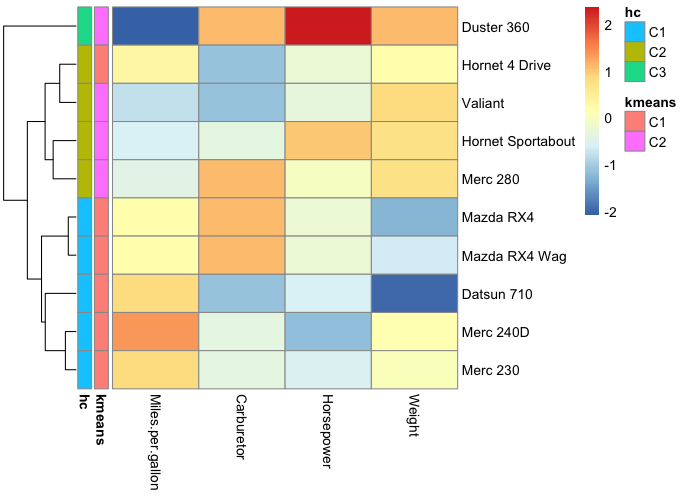

In [12]:
# create the row annotation data frame
row.ann <- data.frame(kmeans = paste0("C",clust_km$cluster),
                      hc = paste0("C",clust_hc))

# rownames are used to match the matrix rows with the row annotation data frame. 
# we can now safely reorder the rows of X.
rownames(row.ann) <- rownames(X) 

pheatmap(X,        
         scale='none',                 # no need to scale, X is scaled
         annotation_row = row.ann,
         cluster_rows=TRUE,
         cluster_cols=FALSE)

#### 3.1 Properties of the Rand Index

Values: between 0 and 1 (including 0 and 1).  
Meaning: 1 means that all pairs in one cluster in $X$ are in one cluster in $Y$ *and* all pairs not in one cluster in $X$ are not in one cluster in $Y$, i.e. $X$ and $Y$ are identical.

#### 3.2 Application of the Rand Index

Compute Rand index between *K*-Means result and cut of hierarchical clustering for given number of groups.

EXERCISE!!

In [13]:
# --------------------

## Dimensionality Reduction with PCA

Heatmaps good for data matrices as long as rows and columns visually resolved, as high data/ink ratio and data shown as raw as possible.  
Problem: dimensions exceeding thousands of variables.  
Hence: dimensionality reduction needed.

Basic idea: if dimension *p* of data too large, then consider representation with dimension *q* containing mus of the information of the original dataset.

---

Principal Component Analysis: project data onto subspace on dimension *q* closest to data according to sums of squared Euclidean distances.

### 1. A Minimal PCA: From 2D to 1D

Get an intuition of PCA.

#### 1.1 Definition of the First Pricipal Component

Geometrically: search line lying as close as possible to data.

Assume: variables centered, hence line passes through origin.

---

If $w$ direction vector of this line, then closest point of observation $x_{i}$ on the line is its orthogonal projection $p_{T}(x_{i}) = (w^{T} x_{i})w$.

Hence we want $w$ such that: $\text{min}_{w} \sum^{n}_{i=1} ||x - p_{T}(x_{i})||^{2}$ s.t. $||w|| = 1$.  
Solution (unique up to the sign) is called "first principal component" (PC1) of the data.

#### 1.2 PC1 Maximizes the Variance of the Projected Data

Use Pythagoras' theorem, i.e. $||x_{i}||^{2} = ||p_{T}(x_{i})||^{2} + ||x_{i} - p_{T}(x_{i})||^{2}$, and $\sum^{n}_{i=1} ||x_{i}||^{2} \equiv \text{const. (w.r.t. }w\text{)}$ to derive maximization problem.

Interpret problem as maximization problem: $\text{max}_{w} \sum^{n}_{i=1} ||p_{T}(x_{i})||^{2}$ s.t. $||w|| = 1$

As data centered: origin = mean of the data, thus $\sum^{n}_{i=1} ||x_{i}||^{2} = \sum^{n}_{i=1} \text{Var}(X) = n \text{Var}(X)$.  
Due to linearity: $\sum^{n}_{i=1} ||p_{T}(x_{i})||^{2} = \sum^{n}_{i=1} \text{Var}(p_{T}(X)) = n \text{Var}(p_{T}(X))$.

Result: PC1 maximizes variance of projected data.

---

Proportion of variance captured by PC1 is defined as ratio of variance of projected data over total variance of data, hence lies between 0 and 1.  
Interpretation: higher proportion means the line is closer to the data, hence it quantifies how good reduction is.

### 2. PCA in Higher Dimensions

General case: search for *q*-dimensional plane closest to data, i.e. the *q*-dimensional plane maximizing the variant of the projected data.

Important property: principal components are related to eigendecompostion of covariance matrix $\frac{1}{n} X^{T}X$ (symmetric, positive) with eigenvectors $w_{1}, \ldots, w_{j}$ and according eigenvalues $\lambda_{1} > \ldots > \lambda_{j}$.

Result: proportion of variance explained by PCA *q*-dimensional plane equals to sum of *q* first eigenvalues.

---

Implications:
1. PCA planes are nested
2. *i*-th principal componente (PC*i*) = *i*-th eigenvector of covariance matrix
3. principal components are linearly uncorrelated (as eigenvectors are orthogonal). If *n* > *p*: PCs form orthonormal basis.

---

Really nice visualization: https://www.joyofdata.de/public/pca-3d/

### 3. PCA in R (`prcomp()`)

`prcomp()` returns informations about:
- `center`: center point
- `scale`: scaling
- `sdev`: standard deviation of each PC
- `x`: values of each sample in terms of PCs
- `rotation`: relationship between initial variables and PCs

Useful: scale data, but not necessary.

Careful: default of `prcomp()` is to *not* scale variables.

---

Some notes regarding hypothetical explained variance values attributed to PCs:
- sum over all percentages for each entry should sum up to $\leq 100\%$
- all PCs are ordered: PC1 > PC2 > ...

(See sheet 5, quiz question 4)

In [14]:
pca_res <- prcomp(mat, center = TRUE, scale. = TRUE) 
names(pca_res)

pca_sum <- summary(pca_res)
pca_sum

# here: PC1 explains 62.9% of the total variance.

[1] "sdev"     "rotation" "center"   "scale"    "x"

Importance of components:
                         PC1    PC2    PC3    PC4
Standard deviation     1.586 0.9664 0.6737 0.3105
Proportion of Variance 0.629 0.2335 0.1135 0.0241
Cumulative Proportion  0.629 0.8624 0.9759 1.0000

### 4. Plotting PCA Results in R

*scree plots* are first step for visualizing PCA output (`plot(<data>, type='l')`) and show variance in each projected direction. *(first plot)*  
Eigenvalues are in y-axis (stand for amount of variation).

Variant of scree plot: plot proportion of total variance for every PC. *(second plot)* 

Use to select PCs for further analysis if scree plot is "elbow" shaped. (Example: choose first two PCs to project data onto two-dimensional space.)

---

`biplot()` shows projection of data onto PC1 and PC2. *(third plot)*  
Includes: positions of each sample in terms of  PC1 and PC2 and shows how initial variable map onto this.

Correlation between variables basen on angle between vectors, where small angle means high correlation.

---

Access projections via `predict()`.

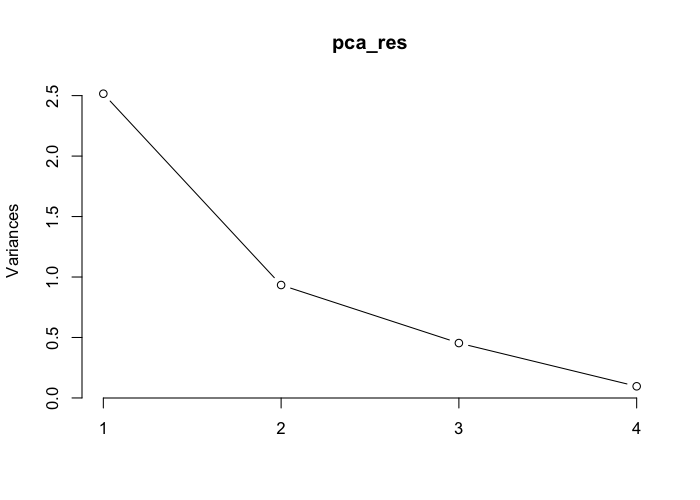

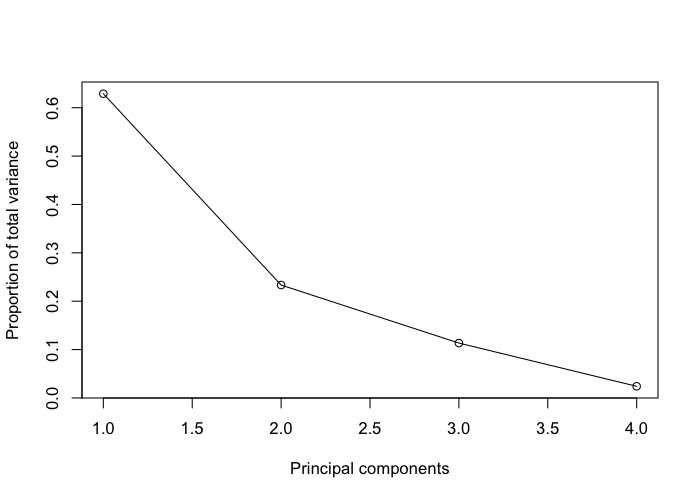

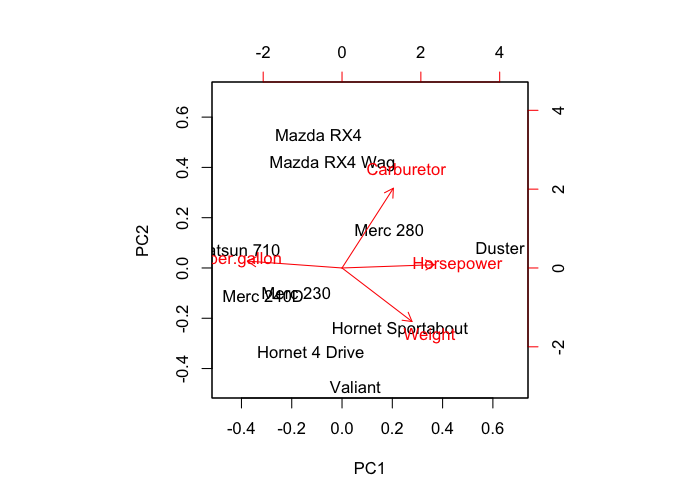

In [15]:
plot(pca_res, type='l')

plot(pca_sum$importance[2,],
     type='l',
     xlab='Principal components',
     ylab="Proportion of total variance")
points(pca_sum$importance[2,])

biplot(pca_res)

In [16]:
predict(pca_res)

,PC1,PC2,PC3,PC4
Mazda RX4,-0.4683249,1.6182751,0.17530341,0.17047731
Mazda RX4 Wag,-0.1906974,1.2697111,-0.25876251,0.08957852
Datsun 710,-2.0776213,0.2274096,1.35795888,0.01780133
Hornet 4 Drive,-0.6221540,-1.0190504,0.13515892,-0.12922895
Hornet Sportabout,1.1556918,-0.7385145,0.28778404,-0.34788481
Valiant,0.2672733,-1.4381382,0.01578234,0.69558672
Duster 360,3.4765710,0.2447894,0.48646675,-0.16580224
Merc 240D,-1.5716800,-0.3318280,-0.91025054,-0.26269735
Merc 230,-0.9115278,-0.2945376,-0.37473618,-0.26813224
Merc 280,0.9424693,0.4618835,-0.91470512,0.20030170


### 5. PCA Summary

Statistical procedure using orthogonal trafos to convert a set of possiblt correlated variables into set of linearly uncorrelated variables, i.e. the principal components.

Each PC explains fraction of total variation in dataset, PC1 has largest possible variance, etc.

Aim: reduce number of variables, while preserving as much information as possible.

Often: PC1 and PC2 used for plotting.

### 6. Nonlinear Dimension Reduction

Limitation of PCA: only linear trafos.

Non-linear alternatives: Independent Component Analysis, kernel PCA, t-SNE, UMAP, ...

In [17]:
# --------------------

## Discussion

- clustering and dimension reduction techniques are supervised learning methods, i.e. aim to discover patterns in data without guidance

- clustering and dimension reduction techniques are exploratory tools, i.e. help to derive hypotheses, which are best tested on indipendent data

- no "right" clustering or subspace in real-life datasets

In [18]:
# --------------------

##### End of Section 4!